### **EDA + REGULARIZED LINEAR REGRESSION - US country level**


### EDA

In [10]:
import pandas as pd

df = pd.read_csv("demographic_health_data.csv")
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [12]:
df.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [13]:
df = df.drop_duplicates(subset=df.columns).dropna().reset_index(drop=True)
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


Categorical Variables:

- `fips`: This likely represents the Federal Information Processing Standards (FIPS) code, which is a standardized set of numeric or alphabetic codes issued by the National Institute of Standards and Technology (NIST) to ensure uniform identification of geographic entities such as counties, towns, and cities in the United States.
- `Urban_rural_code`: This likely categorizes areas as urban or rural, providing information about the geographic nature of the region.

Numerical Variables:

- `0-9`, `19-Oct`, `20-29`, `30-39`, etc.: These appear to represent age groups, possibly demographic data related to age distribution in a population
- `TOT_POP`: Total population, representing the count of individuals in a specified area.
- `0-9 y/o % of total pop`, `10-19 y/o % of total pop`, `20-29 y/o % of total pop`, `30-39 y/o % of total pop`: These seem to represent the percentage of the total population within specific age ranges.
- `COPD_prevalence`, `diabetes_prevalence`, `CKD_prevalence`: These likely represent the prevalence rates of Chronic Obstructive Pulmonary Disease (COPD), diabetes, and Chronic Kidney Disease (CKD) respectively, indicating the proportion of individuals in the population affected by these conditions.
- `COPD_Lower 95% CI`, `COPD_Upper 95% CI`, `diabetes_Lower 95% CI`, `diabetes_Upper 95% CI`, `CKD_Lower 95% CI`, `CKD_Upper 95% CI`: These variables might represent the lower and upper bounds of the confidence intervals (CI) for the prevalence rates of COPD, diabetes, and CKD.
- `COPD_number`, `diabetes_number`, `CKD_number`: These could represent the actual counts or numbers of individuals diagnosed with COPD, diabetes, and CKD respectively.


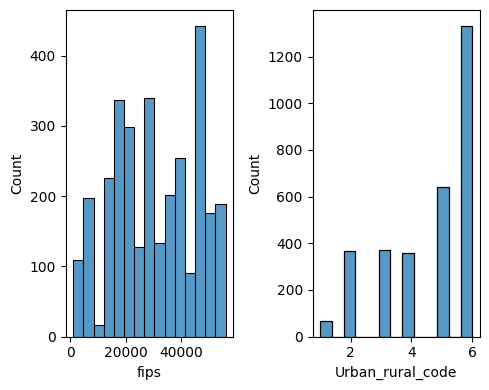

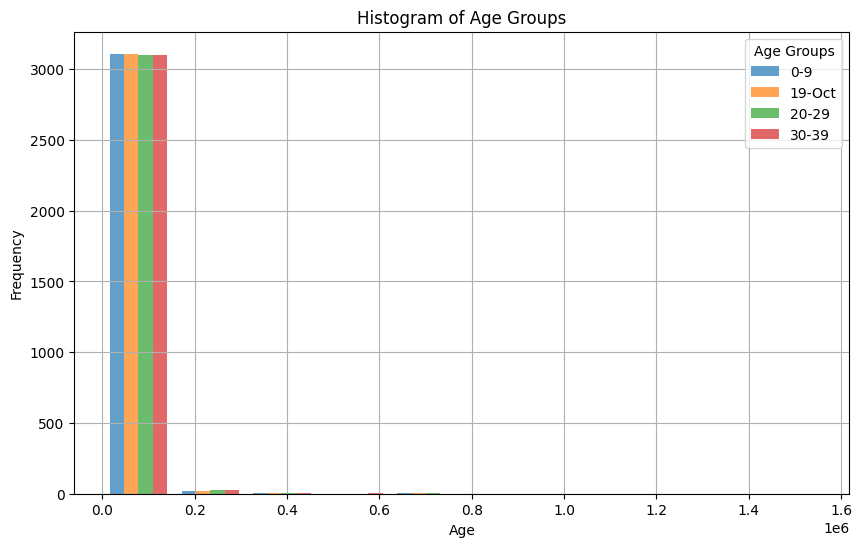

In [46]:
#CATEGORICAL ANALYSIS

import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 2, figsize=(5, 4))

sns.histplot(ax=axis[0], data=df, x="fips")
sns.histplot(ax=axis[1], data=df, x="Urban_rural_code")

plt.tight_layout()
plt.show()

#Agrupation of age variables

age_groups = df[['0-9', '19-Oct', '20-29', '30-39']]

# Plot histogram for each age group
plt.figure(figsize=(10, 6))
plt.hist(age_groups.values, bins=10, alpha=0.7, label=age_groups.columns)

plt.title('Histogram of Age Groups')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Age Groups')
plt.show()


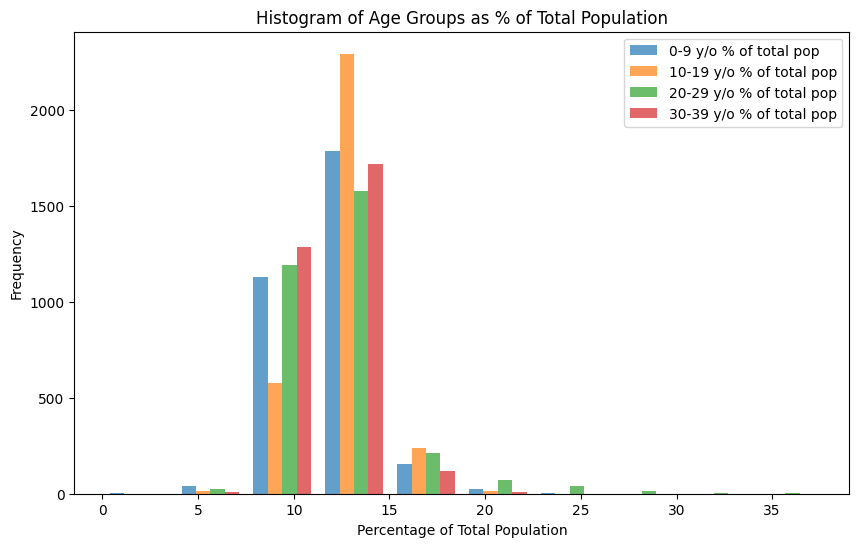

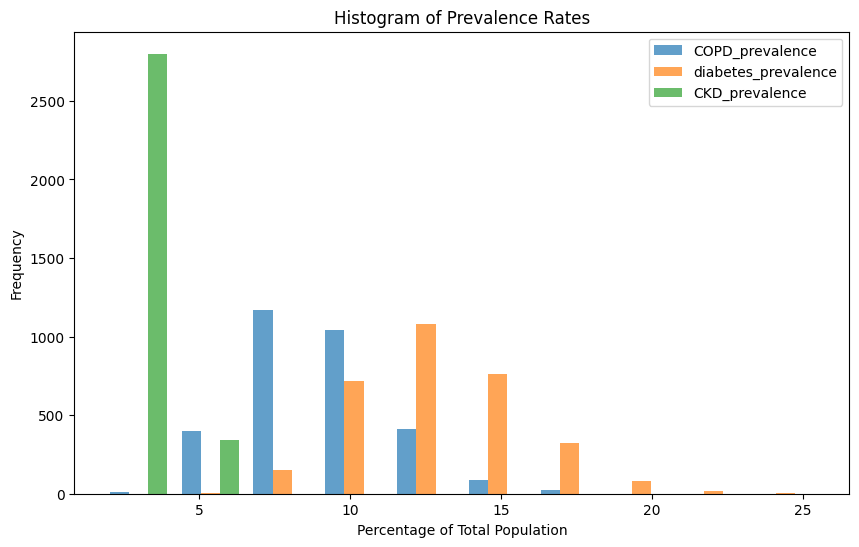

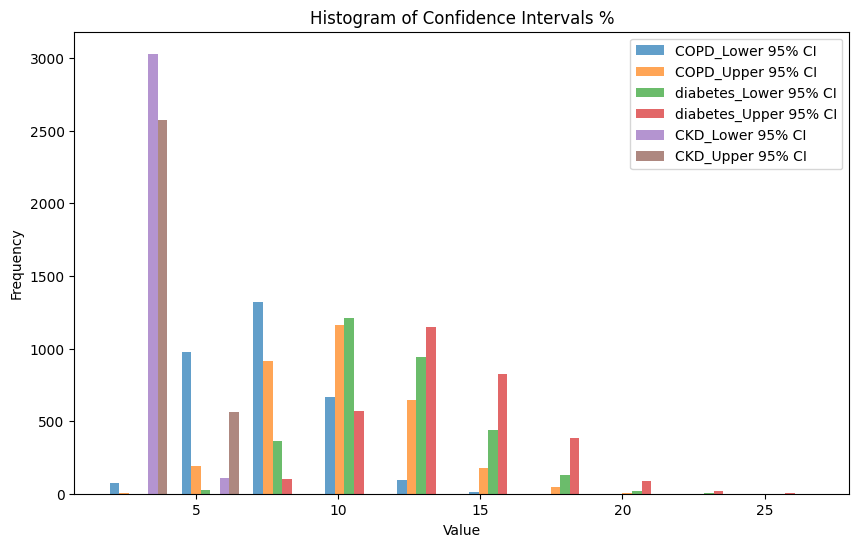

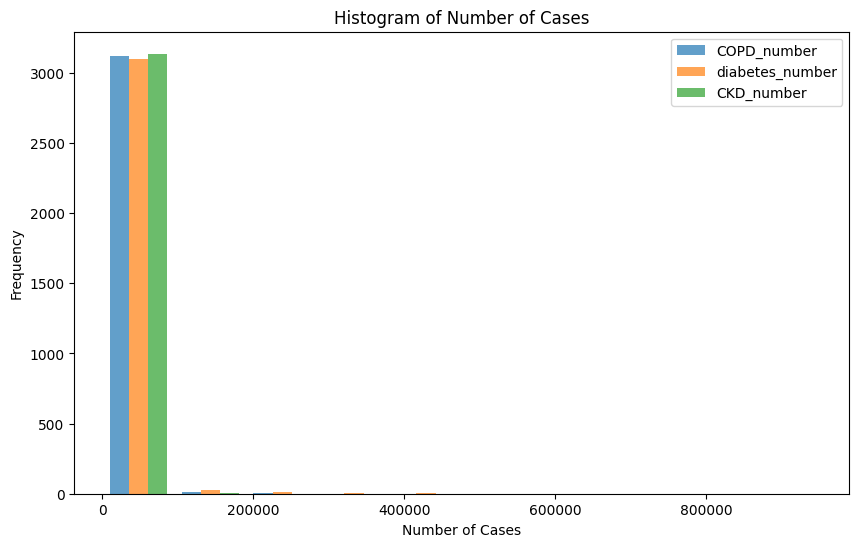

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

data = df[['0-9 y/o % of total pop', '10-19 y/o % of total pop', '20-29 y/o % of total pop', '30-39 y/o % of total pop']]

# Plot histogram for each column
plt.figure(figsize=(10, 6))
plt.hist(data.values, bins=10, alpha=0.7, label=data.columns)

plt.title('Histogram of Age Groups as % of Total Population')
plt.xlabel('Percentage of Total Population')
plt.ylabel('Frequency')
plt.legend()
plt.show()


data = df[['COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence']]

# Plot histogram for each column
plt.figure(figsize=(10, 6))
plt.hist(data.values, bins=10, alpha=0.7, label=data.columns)

plt.title('Histogram of Prevalence Rates')
plt.xlabel('Percentage of Total Population')
plt.ylabel('Frequency')
plt.legend()
plt.show()

data = df[['COPD_Lower 95% CI', 'COPD_Upper 95% CI', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI']]

# Plot histogram for each column
plt.figure(figsize=(10, 6))
plt.hist(data.values, bins=10, alpha=0.7, label=data.columns)

plt.title('Histogram of Confidence Intervals %')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

data = df[['COPD_number', 'diabetes_number', 'CKD_number']]

# Plot histogram for each column
plt.figure(figsize=(10, 6))
plt.hist(data.values, bins=10, alpha=0.7, label=data.columns)

plt.title('Histogram of Number of Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [48]:
sns.pairplot(data=df)

Error in callback <function flush_figures at 0x000002444E18CB80> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 